Amplitude=-0.5732593218019584, Angular freq.=0.017303776476478395, phase=-0.9624165537652598,  Max. Cov.=[[ 2.64359219e-05 -1.02118564e-07  4.51211581e-06]
 [-1.02118564e-07  1.58685922e-08 -3.62559745e-07]
 [ 4.51211581e-06 -3.62559745e-07  6.36324137e-05]]
Errore Amp
0.005141587493033305
Errore freq
0.00012597060047710433
Errore phase
0.007976992774228696


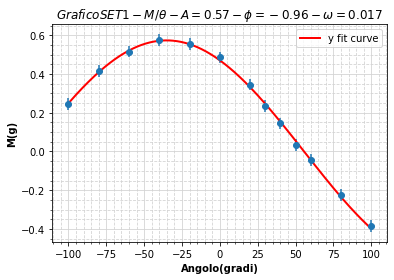

MinAngle
55.615561556155626
Amplitude=0.5623095585597657, Angular freq.=0.018115838782104064, phase=-0.8872113691294992,  Max. Cov.=[[ 3.00765276e-05  6.25768798e-08 -1.04726421e-05]
 [ 6.25768798e-08  1.98754486e-08 -2.76701209e-07]
 [-1.04726421e-05 -2.76701209e-07  9.12985478e-05]]
Errore Amp
0.005484207111319127
Errore freq
0.0001409803126948075
Errore phase
0.00955502735519243


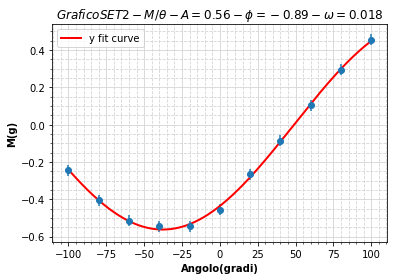

MinAngle
48.97489748974897
[-100  -80  -60  -40  -20    0   20   40   60   80  100]
errore Angle1 dopo ricucitura
0.9570480191696582
errore Angle 2 dopo ricucitura
1.0474627405845756
Amplitude=0.5681447471473325, Angular freq.=0.017682344103412857, phase=0.0004636210765836214,  Max. Cov.=[[ 2.66152784e-05  7.64681191e-09 -6.62416623e-06]
 [ 7.64681191e-09  5.59565030e-09 -1.22694626e-06]
 [-6.62416623e-06 -1.22694626e-06  3.34713652e-04]]
Errore Amp
0.005158999751364632
Errore freq
7.480407940601003e-05
Errore phase
0.018295181115061333


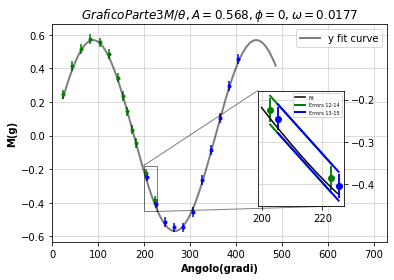

Errore masse dopo ricucitura
0.07432361670424824


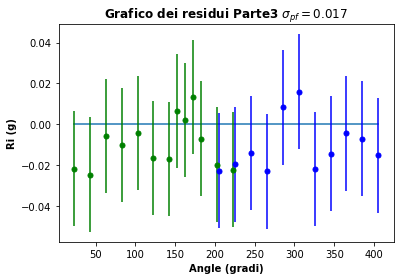

sigma_post_fit
0.01670968218278302


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


F = ([2.45E-01,4.15E-01,5.15E-01,5.75E-01,5.55E-01,4.85E-01,3.45E-01,1.45E-01,-4.50E-02,-2.25E-01,-3.85E-01,3.50E-02,2.35E-01])
Angle = np.array([-100,-80,-60,-40,-20,0,20,40,60,80,100,50,30])

Angle_err = np.ones(len(Angle))*0.5
F_err = np.ones(len(F))*0.03


fig = plt.figure()
ax = fig.gca()

plt.title(r'$ Grafico SET1 - M/\theta - A = 0.57 - \phi = -0.96 - \omega = 0.017$',fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.errorbar(Angle, F, xerr=Angle_err, yerr=F_err, fmt='o')




def fit_sin(tt, yy, guess):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    #guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0.])

    def sinfunc(t, A, w, p):  return A * np.sin(w*t + p) 
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess,sigma=F_err)
    A, w, p = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p)
    return {"amp": A, "omega": w, "phase": p, "freq": f, "period": 1./f, "fitfunc": fitfunc, "cov": pcov, "rawres": (guess,popt,pcov)}


res = fit_sin(Angle, F,np.array([-0.5406812490869503,0.01818277162266147,-0.9330953952064085]))
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s,  Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
phi_set1_err = err[2]
print(err[2])


x = np.linspace(min(Angle),max(Angle),10000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()
phi_set1 = res["phase"]*360/2/np.pi

MinAngle = 360
MinValue = 100
for i in range(10000):
  if(np.abs(res["fitfunc"](x[i])) < MinValue):
    MinValue = np.abs(res["fitfunc"](x[i]))
    MinAngle = x[i]

MinAngle =  MinAngle
print("MinAngle")
print(MinAngle)




F2 = ([-2.45E-01,-4.05E-01,-5.15E-01,-5.45E-01,-5.45E-01,-4.55E-01,-2.65E-01,-8.50E-02,1.05E-01,2.95E-01,4.55E-01])
Angle2 = np.array([-100,-80,-60,-40,-20,0,20,40,60,80,100])

Angle_err = np.ones(len(Angle2))*0.5
F_err = np.ones(len(F2))*0.03


fig = plt.figure()
ax = fig.gca()

plt.title(r'$ Grafico SET2 - M/\theta - A = 0.56 - \phi = -0.89 - \omega = 0.018$',fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.errorbar(Angle2, F2, xerr=Angle_err, yerr=F_err, fmt='o')

res = fit_sin(Angle2, F2,np.array([0.540153013770123,0.018568647719273988,-0.8686816133362655]))
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s,  Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
phi_set2_err = err[2]
print(err[2])


x = np.linspace(min(Angle2),max(Angle2),10000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()
phi_set2 = res["phase"]*360/2/np.pi

MinAngle2 = 360
MinValue = 100
for i in range(10000):
  if(np.abs(res["fitfunc"](x[i])) < MinValue):
    MinValue = np.abs(res["fitfunc"](x[i]))
    MinAngle2 = x[i]

MinAngle2 = MinAngle2
print("MinAngle")
print(MinAngle2)


Ftot = np.concatenate([F,F2])
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
Angle_err = np.ones(len(Angle)+len(Angle2))*0.5
F_err = np.ones(len(F)+len(F2))*0.028
#per il fit commentare questa riga

#RICUCITURA

#Angle = Angle - 360*phi_set1/2/np.pi
#Angle2 = Angle2 - 360*phi_set2/2/np.pi

#Angle = Angle + MinAngle
#Angle = Angle -53.4637
#Angle = Angle +53.4637+70.63
print(Angle2)
#Angle2 = Angle2 + 180+MinAngle*2-MinAngle2-8.5
#Angle2 = Angle2 + 180+2.13067
#Angle2 = Angle2 + 180+55.6021+70.63
Angle = Angle +phi_set1+180-0.0355859746720603*360/2/np.pi
Angle2 = Angle2 + 360+phi_set2-1.75-0.0355859746720603*360/2/np.pi

err_Angle1 = Angle_err[0]+360*(phi_set1_err)/(2*np.pi)
print("errore Angle1 dopo ricucitura")
print(err_Angle1)
err_Angle2 = Angle_err[0]+360*(phi_set2_err)/(2*np.pi)
print("errore Angle 2 dopo ricucitura")
print(err_Angle2)

Angletot = np.concatenate([Angle,Angle2])

res = fit_sin(Angletot, Ftot,np.array([0.540153013770123,0.018568647719273988,-0.8686816133362655]))
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s,  Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])


fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(min(Angletot),max(Angletot)*1.5, 10)
plt.xlim(0,max(Angletot)*1.8)
plt.title(r'$ Grafico Parte3 M/\theta, A = 0.568, \phi = 0, \omega = 0.0177$',fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)

plt.errorbar(Angle, F, xerr=Angle_err[0], yerr=F_err[0], fmt='o', color="green", markersize=3)
plt.errorbar(Angle2, F2, xerr=Angle_err[0], yerr=F_err[0], fmt='o', color="blue", markersize=3)


x = np.linspace(min(Angletot),max(Angletot)*1.2,1000)
A = res["amp"]
phi = res["phase"]

w = res["omega"]


Ff = res["fitfunc"](Angletot)
plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2, color="black", alpha=0.5)
x = np.linspace(min(Angletot), max(Angletot),1000)
y = (A)*np.sin(x*2*np.pi/360+phi)
#plt.plot(x,y)
plt.legend(loc="best")

X_detail = np.linspace(200, 225, 1000)
Y_detail = res["fitfunc"](X_detail)
# location for the zoomed portion 
sub_axes = plt.axes([.6, .25, .2, .4]) 
sub_axes.yaxis.tick_right()
sub_axes.plot(X_detail,Y_detail, color="black",label="Fit")
# plot the zoomed portion
sub_axes.errorbar(Angletot[9], Ftot[9], xerr=Angle_err[9], yerr=F_err[9], fmt='o', color="green", markersize=3)
sub_axes.errorbar(Angletot[10], Ftot[10], xerr=Angle_err[10], yerr=F_err[10], fmt='o', color="green", markersize=3)
sub_axes.errorbar(Angletot[13], Ftot[13], xerr=Angle_err[13], yerr=F_err[13], fmt='o', color="blue", markersize=3)
sub_axes.errorbar(Angletot[14], Ftot[14], xerr=Angle_err[14], yerr=F_err[14], fmt='o', color="blue", markersize=3)
sub_axes.grid(color='lightgray',linestyle="-",zorder=0)

x = np.linspace(Angletot[9],Angletot[10],100)
y2 = Ftot[9]
y1 = Ftot[10]
x2 = Angletot[9]
x1 = Angletot[10]
m = (y2-y1)/(x2-x1)
q1 = y1+0.03-m*(x1+0.5)
sub_axes.plot(x, m*x+q1, linewidth=2, color="green", label="Errors 12-14")
q2 = y1-0.03-m*(x1-0.5)
sub_axes.plot(x, m*x+q2, linewidth=2, color="green")

sub_axes.errorbar([Angletot[9],Angletot[10]], [Ftot[9],Ftot[10]], xerr=[0.5,0.5], yerr=[F_err[11],F_err[13]], fmt='o', color="green")
sub_axes.errorbar([Angletot[13],Angletot[14]], [Ftot[13],Ftot[14]], xerr=[0.5,0.5], yerr=[F_err[11],F_err[13]], fmt='o', color="blue")

x = np.linspace(Angletot[13],Angletot[14],100)
y2 = Ftot[13]
y1 = Ftot[14]
x2 = Angletot[13]
x1 = Angletot[14]
m = (y2-y1)/(x2-x1)
q1 = y1+0.03-m*(x1+0.5)
sub_axes.plot(x, m*x+q1, "r-", linewidth=2, color="blue", label="Errors 13-15")
q2 = y1-0.03-m*(x1-0.5)
sub_axes.plot(x, m*x+q2, "r-", linewidth=2, color="blue")
sub_axes.legend(loc="upper right",prop={'size': 5})
ax.indicate_inset_zoom(sub_axes, edgecolor="black")
plt.show()
fig.savefig(f'GraficoMthetaParte3.pdf',dpi = 300)


x = np.linspace(Angletot[13],Angletot[14],100)
y2 = Ftot[13]
y1 = Ftot[14]
x2 = Angletot[13]
x1 = Angletot[14]
m = (y2-y1)/(x2-x1)
q1 = y1+0.03-m*(x1+0.5)
q2 = y1-0.03-m*(x1-0.5)




print("Errore masse dopo ricucitura")
print((0.03**2+(q1-q2)**2)**(1/2))
plt.show()

Ri = Ff-Ftot

Ri1 = res["fitfunc"](Angle)-F
Ri2 = res["fitfunc"](Angle2)-F2

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Parte3 $\sigma_{pf} = 0.017$",fontweight="bold")
plt.xlabel("Angle (gradi)",fontweight="bold")
plt.ylabel("Ri (g)",fontweight="bold")
plt.plot(np.linspace(min(Angletot),max(Angletot),1000),np.zeros(1000))
plt.errorbar(Angle,Ri1, yerr = F_err[0], markersize=5, color='green',zorder=3, fmt='o')
plt.errorbar(Angle2,Ri2, yerr = F_err[0], markersize=5, color='blue',zorder=3, fmt='o')
plt.show()
fig.savefig(f'Residui_Parte3.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-Ftot)**2)/(len(Ff)-3))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)